In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

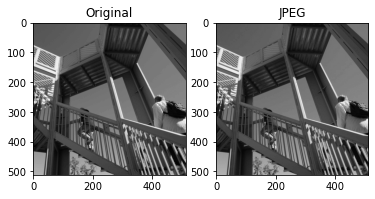

Componente în frecvență:262144
Componente în frecvență după cuantizare: 125064


In [15]:
#Sarcina 1
X = misc.ascent()

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

y_jpeg_full = np.zeros_like(X)

# Encoding
for i in range(0, X.shape[0], 8):
    for j in range(0, X.shape[0], 8):
        x = X[i:i+8, j:j+8]
        y = dctn(x)
        y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
        y_jpeg_full[i:i+8, j:j+8] = y_jpeg

x_jpeg_full = np.zeros_like(X)

# Decoding
for i in range(0, X.shape[0], 8):
    for j in range(0, X.shape[0], 8):
        x_jpeg_full[i:i+8, j:j+8] = idctn(y_jpeg_full[i:i+8, j:j+8])

# Results
y_nnz = np.count_nonzero(dctn(X))
y_jpeg_nnz = np.count_nonzero(y_jpeg_full)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg_full, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

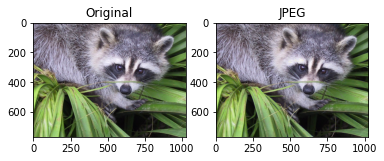

In [8]:
#Sarcina 2
# Pentru a extinde algoritmul la imagini color, in loc să tratam fiecare bloc de 8x8 pixeli ca o singură matrice, vom trata acum fiecare canal de culoare (Y, Cb, Cr) în parte
X = misc.face()

def rgb_to_ycbcr(rgb_image):
    r = rgb_image[:,:,0]
    g = rgb_image[:,:,1]
    b = rgb_image[:,:,2]

    y = 0.299*r + 0.587*g + 0.114*b
    cb = -0.1687*r - 0.3313*g + 0.5*b + 128
    cr = 0.5*r - 0.4187*g - 0.0813*b + 128

    return np.dstack((y, cb, cr))

def ycbcr_to_rgb(ycbcr_image):
    y = ycbcr_image[:,:,0]
    cb = ycbcr_image[:,:,1] - 128
    cr = ycbcr_image[:,:,2] - 128

    r = y + 1.402*cr
    g = y - 0.344136*cb - 0.714136*cr
    b = y + 1.772*cb

    return np.dstack((r, g, b))

Q_y = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
ycbcr_image = rgb_to_ycbcr(X)

y_jpeg_full = np.zeros_like(ycbcr_image)
cb_jpeg_full = np.zeros_like(ycbcr_image)
cr_jpeg_full = np.zeros_like(ycbcr_image)

for i in range(0, ycbcr_image.shape[0], 8):
    for j in range(0, ycbcr_image.shape[1], 8):
        y_block = ycbcr_image[i:i+8, j:j+8, 0]
        cb_block = ycbcr_image[i:i+8, j:j+8, 1]
        cr_block = ycbcr_image[i:i+8, j:j+8, 2]
        
        # DCT și cuantizare pentru fiecare canal
        y_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(y_block) / Q_y) * Q_y
        cb_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(cb_block) / Q_y) * Q_y
        cr_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(cr_block) / Q_y) * Q_y

# Decoding
for i in range(0, ycbcr_image.shape[0], 8):
    for j in range(0, ycbcr_image.shape[1], 8):
        y_jpeg_block = y_jpeg_full[i:i+8, j:j+8, 0]
        cb_jpeg_block = cb_jpeg_full[i:i+8, j:j+8, 0]
        cr_jpeg_block = cr_jpeg_full[i:i+8, j:j+8, 0]

        # IDCT pentru fiecare canal
        ycbcr_image[i:i+8, j:j+8, 0] = idctn(y_jpeg_block)
        ycbcr_image[i:i+8, j:j+8, 1] = idctn(cb_jpeg_block)
        ycbcr_image[i:i+8, j:j+8, 2] = idctn(cr_jpeg_block)

decoded_image = ycbcr_to_rgb(ycbcr_image).astype(np.uint8())

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(decoded_image)
plt.title('JPEG')
plt.show()


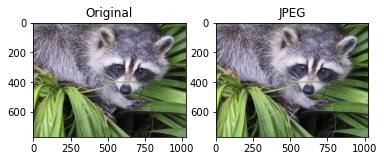

In [9]:
#Sarcina 3
X = misc.face()

def rgb_to_ycbcr(rgb_image):
    r = rgb_image[:,:,0]
    g = rgb_image[:,:,1]
    b = rgb_image[:,:,2]

    y = 0.299*r + 0.587*g + 0.114*b
    cb = -0.1687*r - 0.3313*g + 0.5*b + 128
    cr = 0.5*r - 0.4187*g - 0.0813*b + 128

    return np.dstack((y, cb, cr))

def ycbcr_to_rgb(ycbcr_image):
    y = ycbcr_image[:,:,0]
    cb = ycbcr_image[:,:,1] - 128
    cr = ycbcr_image[:,:,2] - 128

    r = y + 1.402*cr
    g = y - 0.344136*cb - 0.714136*cr
    b = y + 1.772*cb

    return np.dstack((r, g, b))

Q_y = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
def encode (image):
    ycbcr_image = rgb_to_ycbcr(image)

    y_jpeg_full = np.zeros_like(ycbcr_image)
    cb_jpeg_full = np.zeros_like(ycbcr_image)
    cr_jpeg_full = np.zeros_like(ycbcr_image)

    for i in range(0, ycbcr_image.shape[0], 8):
        for j in range(0, ycbcr_image.shape[1], 8):
            y_block = ycbcr_image[i:i+8, j:j+8, 0]
            cb_block = ycbcr_image[i:i+8, j:j+8, 1]
            cr_block = ycbcr_image[i:i+8, j:j+8, 2]
            
            # DCT și cuantizare pentru fiecare canal
            y_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(y_block) / Q_y) * Q_y
            cb_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(cb_block) / Q_y) * Q_y
            cr_jpeg_full[i:i+8, j:j+8, 0] = np.round(dctn(cr_block) / Q_y) * Q_y

    return y_jpeg_full, cb_jpeg_full, cr_jpeg_full

# Decoding
def decode (y_jpeg_full, cb_jpeg_full, cr_jpeg_full):
    for i in range(0, ycbcr_image.shape[0], 8):
        for j in range(0, ycbcr_image.shape[1], 8):
            y_jpeg_block = y_jpeg_full[i:i+8, j:j+8, 0]
            cb_jpeg_block = cb_jpeg_full[i:i+8, j:j+8, 0]
            cr_jpeg_block = cr_jpeg_full[i:i+8, j:j+8, 0]

            # IDCT pentru fiecare canal
            ycbcr_image[i:i+8, j:j+8, 0] = idctn(y_jpeg_block)
            ycbcr_image[i:i+8, j:j+8, 1] = idctn(cb_jpeg_block)
            ycbcr_image[i:i+8, j:j+8, 2] = idctn(cr_jpeg_block)
    
    return ycbcr_to_rgb(ycbcr_image).astype(np.uint8())

encoded_image = encode(X)
decoded_image = decode(encoded_image[0], encoded_image[1], encoded_image[2])

max_mse = 1

while True:
    if ((decoded_image - X) ** 2).mean() >= max_mse:
        break
    encoded_image = encode(decoded_image)
    decoded_image = decode(encoded_image[0],encoded_image[1],encoded_image[2])

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(decoded_image)
plt.title('JPEG')
plt.show()

In [10]:
#Sarcina 4

import cv2

In [13]:
def compress_and_decompress_frame(frame):
    encoded_frame = encode(frame)
    decoded_frame = decode(encoded_frame[0], encoded_frame[1], encoded_frame[2])
    return decoded_frame

video_capture = cv2.VideoCapture('dumb_horse.mp4')

if not video_capture.isOpened():
    print("Eroare la deschiderea videoclipului.")
    exit()

fps = int(video_capture.get(cv2.CAP_PROP_FPS))
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
num_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"FPS: {fps}, Dimensiuni cadre: {frame_width}x{frame_height}, Număr cadre: {num_frames}")

# Parcurgeți fiecare cadru din videoclip
while True:
    # Citiți un cadru
    ret, frame = video_capture.read()

    # Ieșiți din buclă dacă nu există mai multe cadre
    if not ret:
        break

    # Convertiți cadru din BGR în RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Aplicați compresia și decompresia pentru cadru
    processed_frame = compress_and_decompress_frame(frame_rgb)

    # Afișați imaginea originală și imaginea procesată
    plt.subplot(121).imshow(frame_rgb)
    plt.title('Original Frame')
    plt.subplot(122).imshow(processed_frame)
    plt.title('Processed Frame')
    plt.show()

# Eliberați resursele video
video_capture.release()
cv2.destroyAllWindows()

FPS: 30, Dimensiuni cadre: 512x512, Număr cadre: 30


ValueError: invalid number of data points ([8, 0]) specified